<a href="https://colab.research.google.com/github/RajeshreeKale/INFO-7374-Team-11/blob/master/Functional_API(MIMO%2BInception).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Keras Functional API-Multi-input Multi-output model

In [0]:
import keras
from keras.layers import Input, Embedding, LSTM, Dense
from keras.models import Model
from keras.utils import plot_model
import numpy as np
from keras.datasets import cifar10
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import concatenate
import matplotlib.pyplot as plt
from keras.optimizers import SGD

# Headline input: meant to receive sequences of 100 integers, between 1 and 10000.
headline_data = np.random.randint(1, 10000 + 1, size=(32, 100))
additional_data = np.random.randint(1, 10000 + 1, size=(32, 5))
labels = np.random.randint(0, 1 + 1, size=(32, 1))

# Note that we can name any layer by passing it a "name" argument.
main_input = Input(shape=(100,), dtype='int32', name='main_input')

# This embedding layer will encode the input sequence
# into a sequence of dense 512-dimensional vectors.
x = Embedding(output_dim=512, input_dim=10000, input_length=100)(main_input)

# A LSTM will transform the vector sequence into a single vector,
# containing information about the entire sequence
lstm_out = LSTM(32)(x)



In [0]:
auxiliary_output = Dense(1, activation='sigmoid', name='aux_output')(lstm_out)

In [0]:
auxiliary_input = Input(shape=(5,), name='aux_input')
x = keras.layers.concatenate([lstm_out, auxiliary_input])

# We stack a deep densely-connected network on top
x = Dense(64, activation='relu')(x)
x = Dense(64, activation='relu')(x)
x = Dense(64, activation='relu')(x)

# And finally we add the main logistic regression layer
main_output = Dense(1, activation='sigmoid', name='main_output')(x)

In [0]:
model = Model(inputs=[main_input, auxiliary_input], outputs=[main_output, auxiliary_output])

In [0]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy',
              loss_weights=[1., 0.2])

In [23]:
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
main_input (InputLayer)         (None, 100)          0                                            
__________________________________________________________________________________________________
embedding_3 (Embedding)         (None, 100, 512)     5120000     main_input[0][0]                 
__________________________________________________________________________________________________
lstm_3 (LSTM)                   (None, 32)           69760       embedding_3[0][0]                
__________________________________________________________________________________________________
aux_input (InputLayer)          (None, 5)            0                                            
__________________________________________________________________________________________________
concatenat

In [0]:
plot_model(model=model,to_file="model.png")

In [25]:
model.fit([headline_data, additional_data], [labels, labels],
          epochs=50, batch_size=32)

Epoch 1/50
32/32 [==============================] - 2s 55ms/step - loss: 8.1266 - main_output_loss: 7.9877 - aux_output_loss: 0.6947
Epoch 2/50
32/32 [==============================] - 0s 7ms/step - loss: 8.1160 - main_output_loss: 7.9877 - aux_output_loss: 0.6417
Epoch 3/50
32/32 [==============================] - 0s 7ms/step - loss: 8.1051 - main_output_loss: 7.9877 - aux_output_loss: 0.5871
Epoch 4/50
32/32 [==============================] - 0s 7ms/step - loss: 8.0914 - main_output_loss: 7.9877 - aux_output_loss: 0.5185
Epoch 5/50
32/32 [==============================] - 0s 7ms/step - loss: 8.0754 - main_output_loss: 7.9877 - aux_output_loss: 0.4387
Epoch 6/50
32/32 [==============================] - 0s 7ms/step - loss: 8.0587 - main_output_loss: 7.9877 - aux_output_loss: 0.3554
Epoch 7/50
32/32 [==============================] - 0s 7ms/step - loss: 8.0434 - main_output_loss: 7.9877 - aux_output_loss: 0.2788
Epoch 8/50
32/32 [==============================] - 0s 7ms/step - loss: 8.0

In [26]:
model.compile(optimizer='rmsprop',
              loss={'main_output': 'binary_crossentropy', 'aux_output': 'binary_crossentropy'},
              loss_weights={'main_output': 1., 'aux_output': 0.2})

# And trained it via:
result = model.fit({'main_input': headline_data, 'aux_input': additional_data},
          {'main_output': labels, 'aux_output': labels},
          epochs=25, batch_size=16)

Epoch 1/25
32/32 [==============================] - 2s 58ms/step - loss: 7.9892 - main_output_loss: 7.9877 - aux_output_loss: 0.0078
Epoch 2/25
32/32 [==============================] - 0s 11ms/step - loss: 7.9887 - main_output_loss: 7.9877 - aux_output_loss: 0.0052
Epoch 3/25
32/32 [==============================] - 0s 11ms/step - loss: 7.9885 - main_output_loss: 7.9877 - aux_output_loss: 0.0041
Epoch 4/25
32/32 [==============================] - 0s 10ms/step - loss: 7.9883 - main_output_loss: 7.9877 - aux_output_loss: 0.0034
Epoch 5/25
32/32 [==============================] - 0s 11ms/step - loss: 7.9882 - main_output_loss: 7.9877 - aux_output_loss: 0.0029
Epoch 6/25
32/32 [==============================] - 0s 11ms/step - loss: 7.9882 - main_output_loss: 7.9877 - aux_output_loss: 0.0025
Epoch 7/25
32/32 [==============================] - 0s 11ms/step - loss: 7.9881 - main_output_loss: 7.9877 - aux_output_loss: 0.0022
Epoch 8/25
32/32 [==============================] - 0s 11ms/step - lo

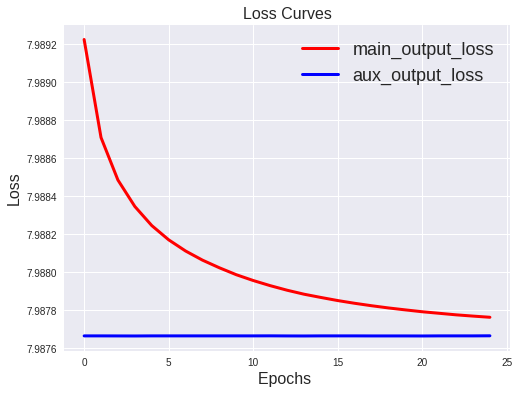

In [28]:
# Loss Curves
plt.figure(figsize=[8,6])
plt.plot(result.history['loss'],'r',linewidth=3.0)
plt.plot(result.history['main_output_loss'],'b',linewidth=3.0)
plt.legend(['main_output_loss', 'aux_output_loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)
plt.savefig('try1.png')

# Accuracy Curves
# plt.figure(figsize=[8,6])
# plt.plot(result.history['acc'],'r',linewidth=3.0)
# plt.plot(result.history['val_acc'],'b',linewidth=3.0)
# plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
# plt.xlabel('Epochs ',fontsize=16)
# plt.ylabel('Accuracy',fontsize=16)
# plt.title('Accuracy Curves',fontsize=16)

#plt.savefig('try2.png')

## Inception Module

In [0]:
import keras
from keras.datasets import cifar10
from keras.utils import np_utils
from keras.layers import Input
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Flatten, Dense
from keras.models import Model
from keras.optimizers import SGD

In [0]:
num_classes=10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
# Convert class vectors to binary class matrices.
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train = X_train / 255.0
X_test = X_test / 255.0

In [0]:
input_img = Input(shape = X_train.shape[1:])

In [0]:
# layer_1 = Conv2D(64, (1,1), padding='same', activation='relu')(input_img)
# layer_1 = Conv2D(64, (3,3), padding='same', activation='relu')(layer_1)
# layer_2 = Conv2D(64, (1,1), padding='same', activation='relu')(input_img)
# layer_2 = Conv2D(64, (5,5), padding='same', activation='relu')(layer_2)
# layer_3 = MaxPooling2D((3,3), strides=(1,1), padding='same')(input_img)
# layer_3 = Conv2D(64, (1,1), padding='same', activation='relu')(layer_3)

In [0]:
#output = keras.layers.concatenate([layer_1, layer_2, layer_3], axis = 3)

In [0]:
from keras.layers import Conv2D, MaxPooling2D, Input

input_img = Input(shape=(32, 32, 3))

tower_1 = Conv2D(16, (1, 1), padding='same', activation='relu')(input_img)
tower_1 = Conv2D(16, (3, 3), padding='same', activation='relu')(tower_1)

tower_2 = Conv2D(32, (1, 1), padding='same', activation='relu')(input_img)
tower_2 = Conv2D(32, (5, 5), padding='same', activation='relu')(tower_2)

tower_3 = MaxPooling2D((3, 3), strides=(1, 1), padding='same')(input_img)
tower_3 = Conv2D(16, (1, 1), padding='same', activation='relu')(tower_3)

output = keras.layers.concatenate([tower_1, tower_2, tower_3], axis=3)
output = Flatten()(output)
out    = Dense(10, activation='softmax')(output)

In [0]:
from keras.models import Model
model = Model(inputs = input_img, outputs = out)

In [12]:
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 32, 32, 3)    0                                            
__________________________________________________________________________________________________
conv2d_6 (Conv2D)               (None, 32, 32, 16)   64          input_2[0][0]                    
__________________________________________________________________________________________________
conv2d_8 (Conv2D)               (None, 32, 32, 32)   128         input_2[0][0]                    
__________________________________________________________________________________________________
max_pooling2d_2 (MaxPooling2D)  (None, 32, 32, 3)    0           input_2[0][0]                    
__________________________________________________________________________________________________
conv2d_7 (

In [0]:
epochs = 10
lrate = 0.01
decay = lrate/epochs
sgd = SGD(lr=lrate, momentum=0.9, decay=decay, nesterov=False)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

In [0]:
from keras.utils import plot_model
plot_model(model,'model_design_inception.png')

In [15]:
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=256)

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 415s 8ms/step - loss: 1.7814 - acc: 0.3759 - val_loss: 1.6184 - val_acc: 0.4189
Epoch 2/10
50000/50000 [==============================] - 414s 8ms/step - loss: 1.4529 - acc: 0.4895 - val_loss: 1.3662 - val_acc: 0.5123
Epoch 3/10
50000/50000 [==============================] - 413s 8ms/step - loss: 1.3128 - acc: 0.5398 - val_loss: 1.3037 - val_acc: 0.5408
Epoch 4/10
50000/50000 [==============================] - 413s 8ms/step - loss: 1.2457 - acc: 0.5624 - val_loss: 1.2525 - val_acc: 0.5521
Epoch 5/10
50000/50000 [==============================] - 413s 8ms/step - loss: 1.1900 - acc: 0.5817 - val_loss: 1.2142 - val_acc: 0.5737
Epoch 6/10
50000/50000 [==============================] - 414s 8ms/step - loss: 1.1490 - acc: 0.5988 - val_loss: 1.1875 - val_acc: 0.5816
Epoch 7/10
50000/50000 [==============================] - 423s 8ms/step - loss: 1.1139 - acc: 0.6134 - val_loss: 1.1869 - 

The evaluation accuracy is

In [16]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 59.52%
